In [18]:
import pandas as pd
import matplotlib.pyplot as mlp
import matplotlib.dates as mdatboii

# Get Data

## Event Data

In [15]:
eventCols = ["event", "timestamp", "type", "stablecoin"]

with open("../data/ERC20-stablecoins/event_data.csv") as event_f:
    event_df = pd.read_csv(event_f, encoding='latin-1', nrows=5)

# Parse timestamp if it is unix seconds
event_df["timestamp"] = pd.to_datetime(event_df["timestamp"], unit="s", utc = True)

In [14]:
tokenCols = [
    "block",
    "log_index",
    "from_addr",
    "to_addr",
    "timestamp",
    "token",
    "amount"
]

token_df = pd.read_csv(
    "../data/ERC20-stablecoins/token_transfers_V3.0.0.csv",
    # sep="\t",
    header=None,
    skiprows=1,
    names=tokenCols
)

# Convert timestamp to datetime
token_df["datetime"] = pd.to_datetime(token_df["timestamp"], unit="s", utc = True)
# token_df["amount"] = pd.to_numeric(token_df["amount"])

get stuff from apr to jun

In [5]:
cutoff_date = pd.Timestamp("2022-06-30", tz="UTC")

token_df = token_df[token_df["datetime"] <= cutoff_date]

get day by day volume

In [6]:
token_df["date"] = token_df["datetime"].dt.date
daily_volume = (
    token_df
    .groupby("date")["amount"]
    .sum()
    .reset_index()
)

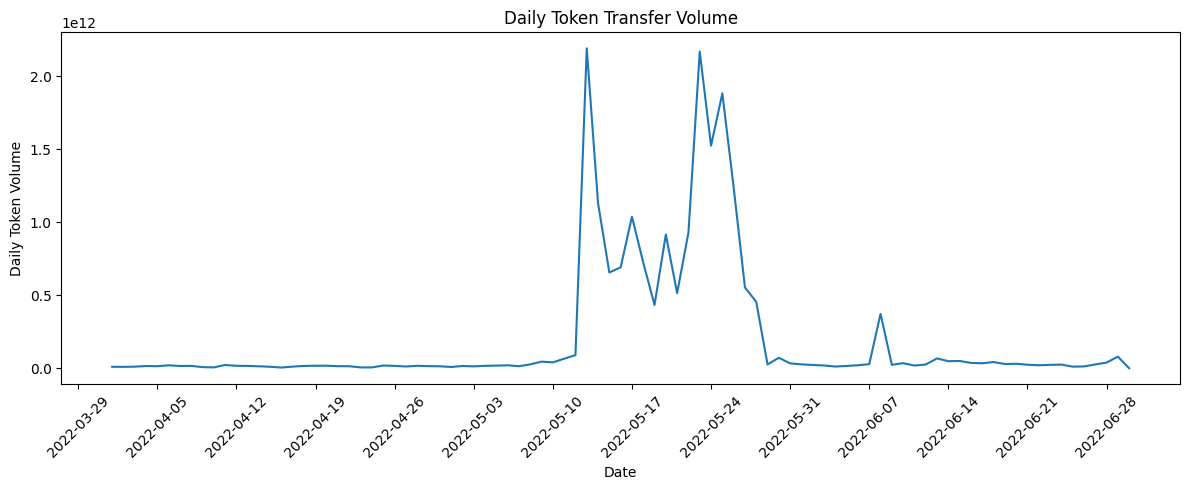

In [29]:

fig, ax = mlp.subplots(figsize=(12, 5))

ax.plot(daily_volume["date"], daily_volume["amount"])

ax.xaxis.set_major_locator(mdatboii.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdatboii.DateFormatter("%Y-%m-%d"))

ax.set_xlabel("Date")
ax.set_ylabel("Daily Token Volume")
ax.set_title("Daily Token Transfer Volume")

mlp.xticks(rotation=45)
mlp.tight_layout()
mlp.show()

# luna vs other coins

In [30]:
coinCols = [
    "timestamp",
    "open",
    "high",
    "low",
    "close"
]

DAI_df = pd.read_csv("../data/ERC20-stablecoins//price_data/dai_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

PAX_df = pd.read_csv("../data/ERC20-stablecoins//price_data/pax_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

USDC_df = pd.read_csv("../data/ERC20-stablecoins//price_data/usdc_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

USDT_df = pd.read_csv("../data/ERC20-stablecoins//price_data/usdt_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

USTC_df = pd.read_csv("../data/ERC20-stablecoins//price_data/ustc_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

WLUNA_df = pd.read_csv("../data/ERC20-stablecoins//price_data/wluna_price_data.csv",
    header=None,
    skiprows=1,
    names=coinCols
)

DAI_df["timestamp"] = pd.to_datetime(DAI_df["timestamp"], unit="s", utc = True)
PAX_df["timestamp"] = pd.to_datetime(PAX_df["timestamp"], unit="s", utc = True)
USDC_df["timestamp"] = pd.to_datetime(USDC_df["timestamp"], unit="s", utc = True)
USDT_df["timestamp"] = pd.to_datetime(USDT_df["timestamp"], unit="s", utc = True)
USTC_df["timestamp"] = pd.to_datetime(USTC_df["timestamp"], unit="s", utc = True)
WLUNA_df["timestamp"] = pd.to_datetime(WLUNA_df["timestamp"], unit="s", utc = True)

cutoff_date = pd.Timestamp("2022-05-22", tz="UTC")
cutfrom_date = pd.Timestamp("2022-04-15", tz="UTC")

DAI_df = DAI_df[(cutfrom_date <=  DAI_df["timestamp"]) & (DAI_df["timestamp"] <= cutoff_date)]
PAX_df = PAX_df[(cutfrom_date <= PAX_df["timestamp"]) & (PAX_df["timestamp"] <= cutoff_date)]
USDC_df = USDC_df[(cutfrom_date <= USDC_df["timestamp"]) & (USDC_df["timestamp"] <= cutoff_date)]
USDT_df = USDT_df[(cutfrom_date <= USDT_df["timestamp"]) & (USDT_df["timestamp"] <= cutoff_date)]
USTC_df = USTC_df[(cutfrom_date <= USTC_df["timestamp"]) & (USTC_df["timestamp"] <= cutoff_date)]
WLUNA_df = WLUNA_df[(cutfrom_date <= WLUNA_df["timestamp"]) & (WLUNA_df["timestamp"] <= cutoff_date)]

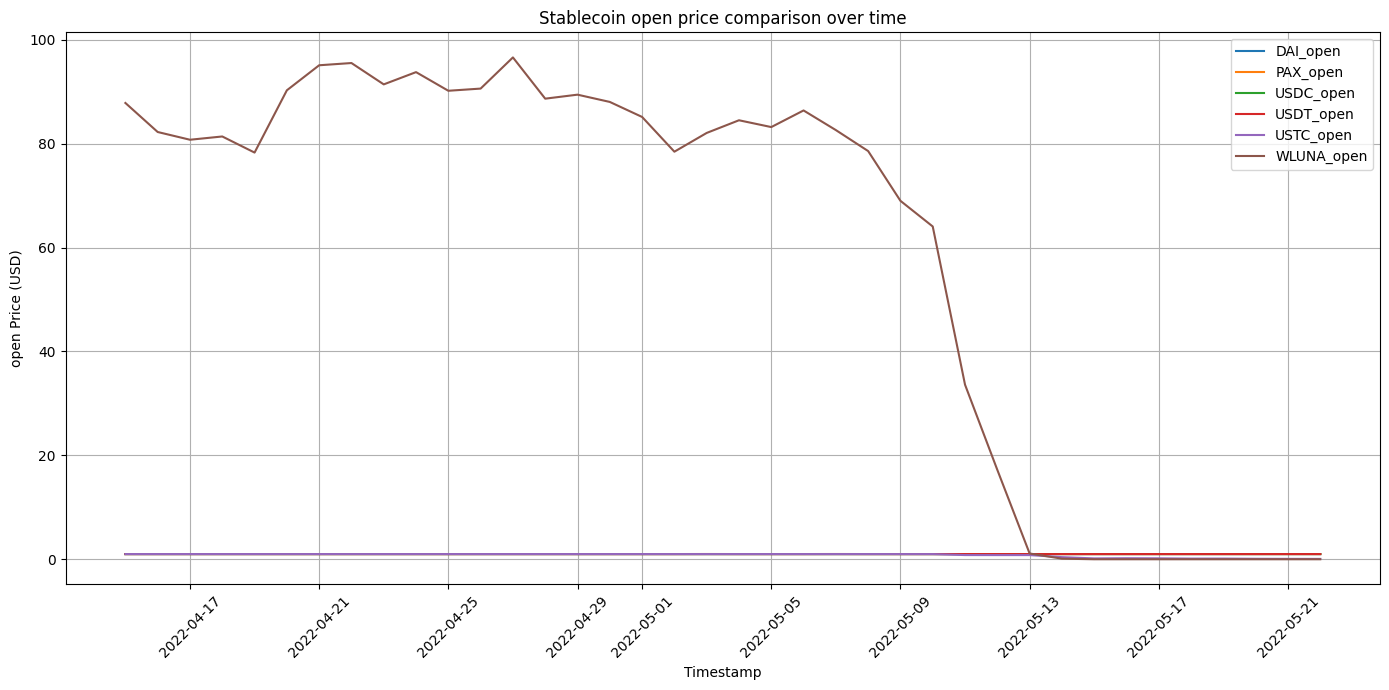

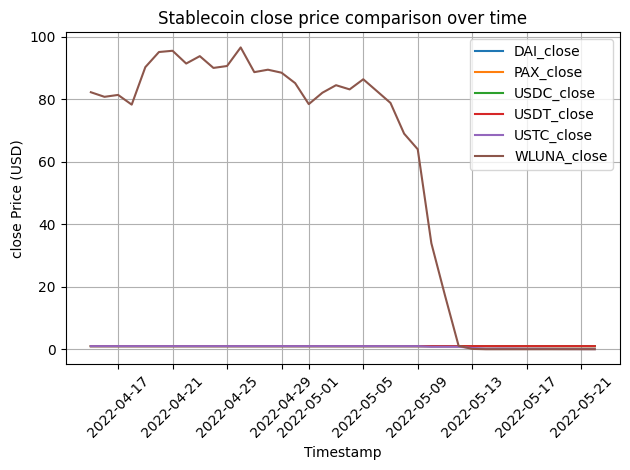

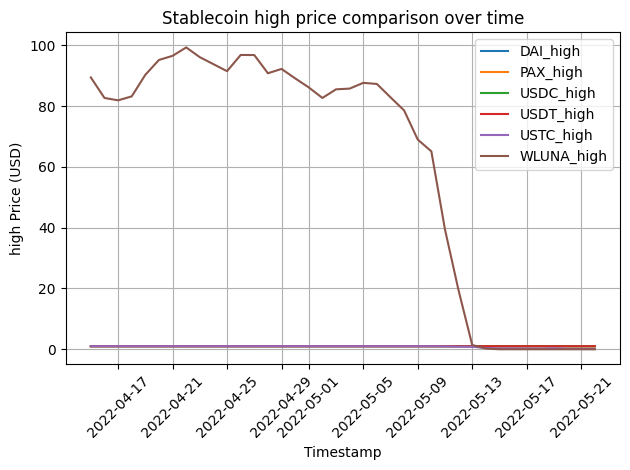

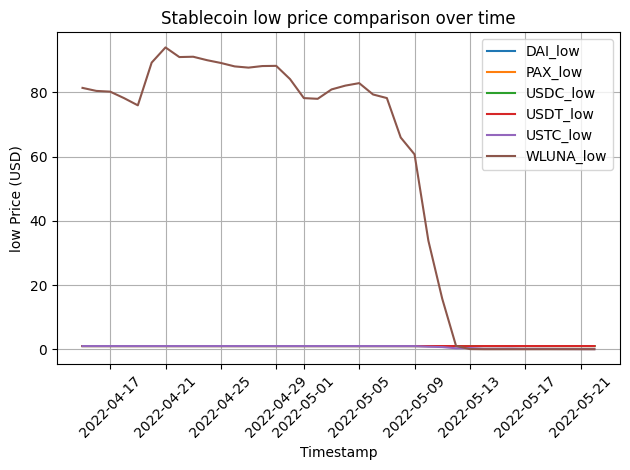

In [31]:
mlp.figure(figsize=(14, 7))

vars = ["open", "close", "high", "low"]

for item in vars:
    mlp.plot(DAI_df["timestamp"], DAI_df[item], label="DAI_" + item)
    mlp.plot(PAX_df["timestamp"], PAX_df[item], label="PAX_" + item)
    mlp.plot(USDC_df["timestamp"], USDC_df[item], label="USDC_" + item)
    mlp.plot(USDT_df["timestamp"], USDT_df[item], label="USDT_" + item)
    mlp.plot(USTC_df["timestamp"], USTC_df[item], label="USTC_" + item)
    mlp.plot(WLUNA_df["timestamp"], WLUNA_df[item], label="WLUNA_" + item)

    mlp.xlabel("Timestamp")
    mlp.ylabel(item + " Price (USD)")
    mlp.title("Stablecoin " + item + " price comparison over time")
    mlp.legend()
    mlp.xticks(rotation = 45)
    mlp.grid(True)
    mlp.tight_layout()
    mlp.show()

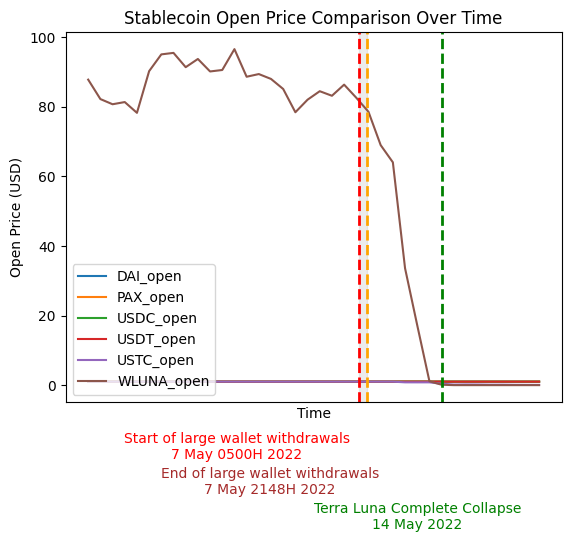

In [32]:
# graph ranges
cutfrom_date = pd.Timestamp("2022-04-15 00:00", tz="UTC")
cutoff_date = pd.Timestamp("2022-05-22 23:59", tz="UTC")

# line dates
startDraw_date = pd.Timestamp("2022-05-07 05:00", tz="UTC")
endDraw_date = pd.Timestamp("2022-05-07 21:48", tz="UTC")
collapse_date = pd.Timestamp("2022-05-14 00:00", tz="UTC")

# trim df
DAI_df = DAI_df[(cutfrom_date <=  DAI_df["timestamp"]) & (DAI_df["timestamp"] <= cutoff_date)]
PAX_df = PAX_df[(cutfrom_date <= PAX_df["timestamp"]) & (PAX_df["timestamp"] <= cutoff_date)]
USDC_df = USDC_df[(cutfrom_date <= USDC_df["timestamp"]) & (USDC_df["timestamp"] <= cutoff_date)]
USDT_df = USDT_df[(cutfrom_date <= USDT_df["timestamp"]) & (USDT_df["timestamp"] <= cutoff_date)]
USTC_df = USTC_df[(cutfrom_date <= USTC_df["timestamp"]) & (USTC_df["timestamp"] <= cutoff_date)]
WLUNA_df = WLUNA_df[(cutfrom_date <= WLUNA_df["timestamp"]) & (WLUNA_df["timestamp"] <= cutoff_date)]

mlp.plot(DAI_df["timestamp"], DAI_df["open"], label="DAI_open")
mlp.plot(PAX_df["timestamp"], PAX_df["open"], label="PAX_open")
mlp.plot(USDC_df["timestamp"], USDC_df["open"], label="USDC_open")
mlp.plot(USDT_df["timestamp"], USDT_df["open"], label="USDT_open")
mlp.plot(USTC_df["timestamp"], USTC_df["open"], label="USTC_open")
mlp.plot(WLUNA_df["timestamp"], WLUNA_df["open"], label="WLUNA_open")

ax = mlp.gca()
ax.xaxis.set_major_locator(mdatboii.DayLocator(interval=20))
ax.xaxis.set_major_formatter(mdatboii.DateFormatter("%Y-%m-%d %H:%M"))

ax.axvline(startDraw_date, linestyle="--", linewidth=2, color='red')
ax.axvline(endDraw_date, linestyle="--", linewidth=2, color='orange')
ax.axvline(collapse_date, linestyle="--", linewidth=2, color='green')

ax.axvspan(startDraw_date, endDraw_date, alpha = 0.15, color = "grey")

ylim = ax.get_ylim()
y_top = ylim[1]

offset1 = pd.Timedelta(days=10)
offset2 = pd.Timedelta(days=8)
offset3 = pd.Timedelta(days=2)

ax.text(startDraw_date - offset1, y_top - 115, "Start of large wallet withdrawals\n7 May 0500H 2022", color="red", fontsize=10, ha="center", va="top", rotation = 0)
ax.text(endDraw_date - offset2, y_top - 125, "End of large wallet withdrawals\n7 May 2148H 2022", color="brown", fontsize=10, ha="center", va="top", rotation = 0)
ax.text(collapse_date - offset3, y_top - 135, "Terra Luna Complete Collapse\n14 May 2022", color="green", fontsize=10, ha="center", va="top", rotation = 0)

mlp.xlabel("Time")
mlp.ylabel("Open Price (USD)")
mlp.title("Stablecoin Open Price Comparison Over Time")
mlp.xticks(rotation = 45)
mlp.legend()
ax.legend(loc="lower left")
mlp.grid(False)

ax.set_xticks([])
ax.set_xticklabels([])
mlp.show()